In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from selenium.webdriver.edge.options import Options
import pandas as pd
import time
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.api as sm


# ---------- 初始化 Edge 浏览器驱动 ----------
def init_driver(headless=True):
    """初始化 Edge 浏览器驱动"""
    edge_options = Options()
    try:
        driver = webdriver.Edge(options=edge_options)
    except Exception as e:
        print(f"驱动初始化失败: {e}")
        raise
    return driver



In [5]:
# ---------- 核心爬取逻辑 ----------
def fetch_houses(driver, main_area, sub_area, max_pages=None):
    """爬取北京指定主区域和子区域的房源数据"""
    base_url = f"https://esf.fang.com/house/{main_area}/"
    driver.get(base_url)
    houses = []
    current_page = 1  # 当前页码计数器

    try:
        # 关闭可能的弹窗
        WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.CLASS_NAME, "close-btn"))
        ).click()
    except TimeoutException:
        pass

    # 选择子区域
    try:
        main_area_link = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, f'//a[contains(text(), "{main_area}")]'))
        )
        main_area_link.click()
        print(f"已点击主区域: {main_area}")
    except TimeoutException:
        print(f"未找到主区域: {main_area}")
        return houses

    try:
        # 点击子区域
        sub_area_link = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, f'//a[contains(text(), "{sub_area}")]'))
        )
        sub_area_link.click()
        print(f"已点击子区域: {sub_area}")
    except TimeoutException:
        print(f"未找到子区域: {sub_area}")
        return houses

    while True:
        try:
            # 等待房源列表加载
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CLASS_NAME, "shop_list"))
            )
            print("房源列表加载完成")

            # 提取当前页数据
            house_list = driver.find_elements(By.CSS_SELECTOR, ".shop_list .clearfix[dataflag='bg']")
            if not house_list:
                print("未找到房源列表，请检查选择器")
                return houses

            for house in house_list:
                try:
                    price_info = house.find_element(By.CLASS_NAME, "price_right")
                    total_price = price_info.find_element(By.CLASS_NAME, "red").text.split("万")[0]
                    unit_price = house.find_element(By.CSS_SELECTOR, "dd.price_right > span:nth-child(2)").text.split("元")[0]
                    info = house.find_element(By.CLASS_NAME, "tel_shop").text.strip()
                    area_info = None
                    for part in info.split("|"):
                        if "㎡" in part:
                            area_info = part.strip().split("㎡")[0].strip()
                            break
                    #print(f"总价: {total_price}, 单价: {unit_price}, 面积: {area_info}")  # 调试输出

                    houses.append({
                        "区域": f"{main_area}-{sub_area}",
                        "总价(w)": total_price,
                        "单价（/㎡)": unit_price,
                        "面积(㎡)": area_info
                    })
                except NoSuchElementException as e:
                    print(f"提取数据失败: {e}")
                    continue

            # 终止条件1：达到指定页数
            if max_pages and current_page >= max_pages:
                print(f"已达到设定的最大页数 {max_pages}")
                break

            # 尝试翻页
            next_page = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, '//p[@class="last"]/a[contains(text(), "下一页")]'))
            )

            # 终止条件2：已是最后一页
            if "disabled" in next_page.get_attribute("class"):
                print("已到达最后一页")
                break

            # 执行翻页
            next_page.click()
            current_page += 1  # 页码递增
            time.sleep(random.uniform(2, 5))  # 随机延迟

            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, "shop_list"))
            )

        except TimeoutException:
            print("翻页超时")
            break
        except NoSuchElementException:
            print("未找到下一页按钮")
            break
        except Exception as e:
            print(f"翻页失败: {e}")
            break

    return houses


# ---------- 保存数据 ----------
def save_to_excel(data, filename):
    df = pd.DataFrame(data)
    df.to_excel(filename, index=False, engine="openpyxl")
    print(f"数据已保存至 {filename}")


if __name__ == "__main__":
    driver = init_driver(headless=False)
    main_area = "北京周边"  # 主区域
    sub_area = "大厂"  # 子区域
    max_pages = None  # 设置为 None 则爬取所有页，设为数字则限制页数

    try:
        houses_data = fetch_houses(driver, main_area, sub_area, max_pages=max_pages)
        save_to_excel(houses_data, f"{main_area}_{sub_area}_前{max_pages}页房源.xlsx")
        print(f"共爬取 {len(houses_data)} 条数据")
    finally:
        driver.quit()

已点击主区域: 北京周边
已点击子区域: 大厂
房源列表加载完成
房源列表加载完成
房源列表加载完成
翻页超时
数据已保存至 北京周边_大厂_前None页房源.xlsx
共爬取 180 条数据


In [3]:
def fetch_rentals_beijing)driver, main_area, sub_area, max_pages=None):
    """爬取北京指定区域的租房数据"""
    base_url = f"https://zu.fang.com"
    driver.get(base_url)
    rentals = []
    current_page = 1  # 当前页码计数器
    main_area_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, f'//a[contains(text(), "{main_area}")]'))
    )
    main_area_link.click()
    sub_area_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, f'//a[contains(text(), "{sub_area}")]'))
    )
    sub_area_link.click()
    try:
        # 关闭可能的弹窗
        WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.CLASS_NAME, "close-btn"))
        ).click()
    except TimeoutException:
        pass

    while True:
        try:
            # 等待房源列表加载
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CLASS_NAME, "houseList"))
            )
            print("房源列表加载完成")

            # 提取当前页数据
            house_list = driver.find_elements(By.CSS_SELECTOR, ".houseList .list")
            if not house_list:
                print("未找到房源列表，请检查选择器")
                return rentals

            for house in house_list:
                try:
                    # 提取价格
                    price = house.find_element(By.CLASS_NAME, "price").text.strip()

                    # 提取面积
                    info = house.find_element(By.CSS_SELECTOR, "p.font15.mt12.bold").text.strip()
                    area_info = None
                    for part in info.split("|"):
                        if "㎡" in part:
                            area_info = part.strip().split("㎡")[0].strip()
                            break

                    rentals.append({
                        "区域": f"{main_area}-{sub_area}",
                        "价格": price,
                        "面积": area_info
                    })

                except NoSuchElementException as e:
                    print(f"提取数据失败: {e}")
                    continue

            # 终止条件1：达到指定页数
            if max_pages and current_page >= max_pages:
                print(f"已达到设定的最大页数 {max_pages}")
                break

            # 尝试翻页
            next_page = WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.XPATH, '//a[contains(text(), "下一页")]'))
            )

            # 终止条件2：已是最后一页
            if "disabled" in next_page.get_attribute("class"):
                print("已到达最后一页")
                break

            # 执行翻页
            next_page.click()
            current_page += 1  # 页码递增
            time.sleep(random.uniform(2, 5))  # 随机延迟

            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, "houseList"))
            )

        except TimeoutException:
            print("翻页超时")
            break
        except NoSuchElementException:
            print("未找到下一页按钮")
            break
        except Exception as e:
            print(f"翻页失败: {e}")
            break

    return rentals


if __name__ == "__main__":
    driver = init_driver(headless=False)
    main_area = "燕郊"  # 目标区域
    sub_area = "燕郊"
    max_pages = None  # 设置为 None 则爬取所有页，设为数字则限制页数

    try:
        rentals_data = fetch_rentals_beijing(driver, main_area, sub_area, max_pages=max_pages)
        save_to_excel(rentals_data, f"{main_area}_{sub_area}_租房_前{max_pages}页房源.xlsx")
        print(f"共爬取 {len(rentals_data)} 条数据")
    finally:
        driver.quit()

房源列表加载完成
房源列表加载完成
房源列表加载完成
房源列表加载完成
房源列表加载完成
房源列表加载完成
房源列表加载完成
房源列表加载完成
房源列表加载完成
房源列表加载完成
翻页超时
数据已保存至 燕郊_燕郊_租房_前None页房源.xlsx
共爬取 547 条数据


In [4]:
def fetch_rentals_langfang(driver, main_area, sub_area, max_pages=None):
    """爬取廊坊指定区域的租房数据"""
    base_url = f"https://lf.zu.fang.com/"
    driver.get(base_url)
    rentals = []
    current_page = 1  # 当前页码计数器
    main_area_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, f'//a[contains(text(), "{main_area}")]'))
    )
    main_area_link.click()
    sub_area_link = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, f'//a[contains(text(), "{sub_area}")]'))
    )
    sub_area_link.click()
    try:
        # 关闭可能的弹窗
        WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.CLASS_NAME, "close-btn"))
        ).click()
    except TimeoutException:
        pass

    while True:
        try:
            # 等待房源列表加载
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CLASS_NAME, "houseList"))
            )
            print("房源列表加载完成")

            # 提取当前页数据
            house_list = driver.find_elements(By.CSS_SELECTOR, ".houseList .list")
            if not house_list:
                print("未找到房源列表，请检查选择器")
                return rentals

            for house in house_list:
                try:
                    # 提取价格
                    price = house.find_element(By.CLASS_NAME, "price").text.strip()

                    # 提取面积
                    info = house.find_element(By.CSS_SELECTOR, "p.font15.mt12.bold").text.strip()
                    area_info = None
                    for part in info.split("|"):
                        if "㎡" in part:
                            area_info = part.strip().split("㎡")[0].strip()
                            break

                    rentals.append({
                        "区域": f"{main_area}-{sub_area}",
                        "价格": price,
                        "面积": area_info
                    })

                except NoSuchElementException as e:
                    print(f"提取数据失败: {e}")
                    continue

            # 终止条件1：达到指定页数
            if max_pages and current_page >= max_pages:
                print(f"已达到设定的最大页数 {max_pages}")
                break

            # 尝试翻页
            next_page = WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.XPATH, '//a[contains(text(), "下一页")]'))
            )

            # 终止条件2：已是最后一页
            if "disabled" in next_page.get_attribute("class"):
                print("已到达最后一页")
                break

            # 执行翻页
            next_page.click()
            current_page += 1  # 页码递增
            time.sleep(random.uniform(2, 5))  # 随机延迟

            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, "houseList"))
            )

        except TimeoutException:
            print("翻页超时")
            break
        except NoSuchElementException:
            print("未找到下一页按钮")
            break
        except Exception as e:
            print(f"翻页失败: {e}")
            break

    return rentals


if __name__ == "__main__":
    driver = init_driver(headless=False)
    main_area = "大厂"  # 目标区域
    sub_area = "大厂"
    max_pages = None  # 设置为 None 则爬取所有页，设为数字则限制页数

    try:
        rentals_data = fetch_rentals_langfang(driver, main_area, sub_area, max_pages=max_pages)
        save_to_excel(rentals_data, f"{main_area}_{sub_area}_租房_前{max_pages}页房源.xlsx")
        print(f"共爬取 {len(rentals_data)} 条数据")
    finally:
        driver.quit()

房源列表加载完成
房源列表加载完成
房源列表加载完成
房源列表加载完成
翻页超时
数据已保存至 大厂_大厂_租房_前None页房源.xlsx
共爬取 211 条数据


Shop Data Description:
              总价(w)         单价（/㎡)        面积(㎡)       loc_dc       loc_yj  \
count   7671.000000    7671.000000  7671.000000  7671.000000  7671.000000   
mean     845.156569   51084.528875   148.637318     0.023465     0.111198   
std      721.956462   24711.874861    79.754973     0.151385     0.314398   
min       15.000000    3410.000000    25.000000     0.000000     0.000000   
25%      350.000000   35094.000000    90.280000     0.000000     0.000000   
50%      680.000000   52721.000000   132.110000     0.000000     0.000000   
75%     1180.000000   66582.000000   179.120000     0.000000     0.000000   
max    11500.000000  150722.000000  1016.230000     1.000000     1.000000   

            loc_yz       loc_mj  
count  7671.000000  7671.000000  
mean      0.782167     0.083170  
std       0.412800     0.276158  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     0.000000  
max       1

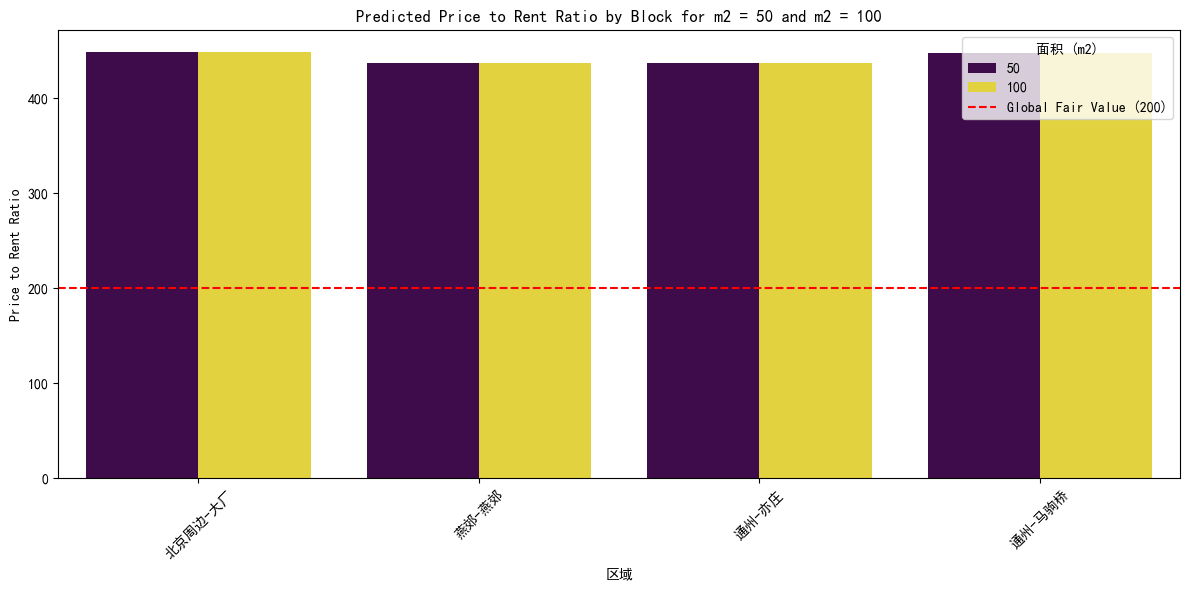

C:\Users\Admin\AppData\Local\Temp\ipykernel_21064\1425816049.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_data, x='区域', y='price_to_rent_ratio', palette='viridis')


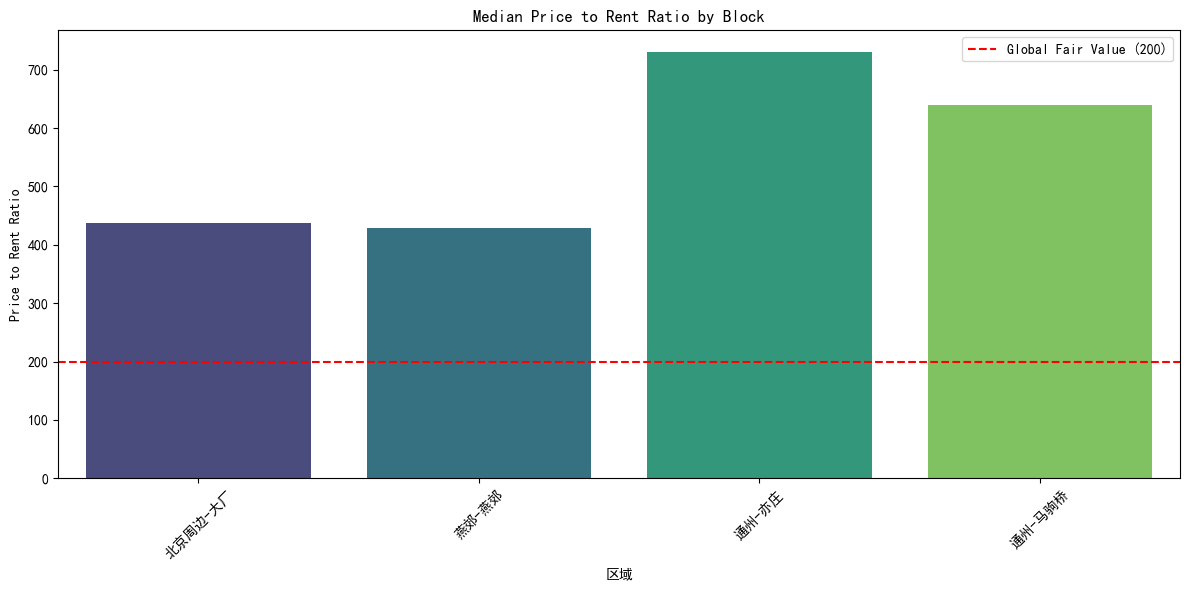

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.api as sm


# 导入爬取的数据
dc_rent = pd.read_excel('大厂_大厂_租房_前None页房源.xlsx')
dc_shop = pd.read_excel('北京周边_大厂_前None页房源.xlsx')
yj_shop = pd.read_excel('燕郊_燕郊_前None页房源.xlsx')
yj_rent = pd.read_excel('燕郊_燕郊_租房_前None页房源.xlsx')
yz_shop = pd.read_excel('通州_亦庄_前None页房源.xlsx')
yz_rent = pd.read_excel('通州_亦庄_租房_前None页房源.xlsx')
mj_shop = pd.read_excel('通州_马驹桥_前None页房源.xlsx')
mj_rent = pd.read_excel('通州_马驹桥_租房_前None页房源.xlsx')

# 增加虚拟变量
dc_rent['区域'] = "北京周边-大厂"
dc_shop['loc_dc'] = 1
dc_rent['loc_dc'] = 1
yj_rent['loc_yj'] = 1
yj_shop['loc_yj'] = 1
yz_rent['loc_yz'] = 1
yz_shop['loc_yz'] = 1
mj_rent['loc_mj'] = 1
mj_shop['loc_mj'] = 1

# 合并租房数据，指定共同的列名
rent = pd.merge(dc_rent, yj_rent, how='outer', on=['区域', '价格', '面积'])
rent = pd.merge(rent, yz_rent, how='outer', on=['区域', '价格', '面积'])
rent = pd.merge(rent, mj_rent, how='outer', on=['区域', '价格', '面积'])
rent.fillna(0, inplace=True)
# 合并购房数据，假设购房数据类似，可以按照相同的方式合并
shop = pd.merge(dc_shop, yj_shop, how='outer', on=['区域', '总价(w)', '单价（/㎡)', '面积(㎡)'])
shop = pd.merge(shop, yz_shop, how='outer', on=['区域', '总价(w)', '单价（/㎡)', '面积(㎡)'])
shop = pd.merge(shop, mj_shop, how='outer', on=['区域', '总价(w)', '单价（/㎡)', '面积(㎡)'])
shop.fillna(0, inplace=True)

print("Shop Data Description:")
print(shop.describe())
print(shop.isnull().sum())  # 检查缺失值

print("\nRent Data Description:")
print(rent.describe())
print(rent.isnull().sum())  # 检查缺失值

# 检测异常值
shop_outliers = shop[(shop['总价(w)'] > (shop['总价(w)'].mean() + 3 * shop['总价(w)'].std())) |
                     (shop['总价(w)'] < (shop['总价(w)'].mean() - 3 * shop['总价(w)'].std()))]
print(f"Shop Outliers Count: {len(shop_outliers)}")

rent_outliers = rent[(rent['价格'] > (rent['价格'].mean() + 3 * rent['价格'].std())) |
                     (rent['价格'] < (rent['价格'].mean() - 3 * rent['价格'].std()))]
print(f"Rent Outliers Count: {len(rent_outliers)}")

# 第二步：计算每个区域的单价和租金
shop['price_per_m2'] = shop['总价(w)']*10000/ shop['面积(㎡)']
rent['rent_per_m2'] = rent['价格'] / rent['面积']

# 第三步：计算每个区域的中位数价格和租金
median_price_per_block = shop.groupby('区域')['price_per_m2'].median().reset_index()
median_rent_per_block = rent.groupby('区域')['rent_per_m2'].median().reset_index()
#print(shop)
#print(rent)

# 合并两个数据框
median_data = pd.merge(median_price_per_block, median_rent_per_block, on='区域', suffixes=('_price', '_rent'))
#print(median_data)
# 计算租金与房价中位数的比值
median_data['price_to_rent_ratio'] = median_data['price_per_m2'] / median_data['rent_per_m2']

rent['m2'] = rent['面积']
shop['m2'] = shop['面积(㎡)']
# 第一步：构建和拟合预测模型
# 为了添加交互项，首先生成交互项
rent['m2_loc_dc'] = rent['m2'] * rent['loc_dc']
rent['m2_loc_yj'] = rent['m2'] * rent['loc_yj']
rent['m2_loc_yz'] = rent['m2'] * rent['loc_yz']
rent['m2_loc_mj'] = rent['m2'] * rent['loc_mj']
shop['m2_loc_dc'] = shop['m2'] * shop['loc_dc']
shop['m2_loc_yj'] = shop['m2'] * shop['loc_yj']
shop['m2_loc_yz'] = shop['m2'] * shop['loc_yz']
shop['m2_loc_mj'] = shop['m2'] * shop['loc_mj']

# 准备自变量
X_price = shop[['m2', 'loc_dc', 'loc_yj', 'loc_yz', 'loc_mj', 'm2_loc_dc', 'm2_loc_yj', 'm2_loc_yz', 'm2_loc_mj']]
X_rent = rent[['m2', 'loc_dc', 'loc_yj', 'loc_yz', 'loc_mj', 'm2_loc_dc', 'm2_loc_yj', 'm2_loc_yz', 'm2_loc_mj']]

# 添加常数项
X_price = sm.add_constant(X_price)
X_rent = sm.add_constant(X_rent)

# 响应变量
y_price = shop['price_per_m2']
y_rent = rent['rent_per_m2']

# 拟合模型
price_model = sm.OLS(y_price, X_price).fit()
rent_model = sm.OLS(y_rent, X_rent).fit()

# 打印模型摘要
print(price_model.summary())
print(rent_model.summary())

# 第二步：使用模型预测价格和租金
m2_values = [50, 100]

predictions = []

for m2 in m2_values:
    # 准备预测数据
    price_data = pd.DataFrame({
        'const': 1,
        'm2':shop['m2'],
        'loc_dc': shop['loc_dc'],
        'loc_yj': shop['loc_yj'],
        'loc_yz': shop['loc_yz'],
        'loc_mj': shop['loc_mj'],
    })
    # 添加交互项
    price_data['m2_loc_dc'] = price_data['m2'] * price_data['loc_dc']
    price_data['m2_loc_yj'] = price_data['m2'] * price_data['loc_yj']
    price_data['m2_loc_yz'] = price_data['m2'] * price_data['loc_yz']
    price_data['m2_loc_mj'] = price_data['m2'] * price_data['loc_mj']

    rent_data = pd.DataFrame({
        'const': 1,
        'm2':rent['m2'],
        'loc_dc': rent['loc_dc'],
        'loc_yj': rent['loc_yj'],
        'loc_yz': rent['loc_yz'],
        'loc_mj': rent['loc_mj'],
    })
    rent_data['m2_loc_dc'] = rent_data['m2'] * rent_data['loc_dc']
    rent_data['m2_loc_yj'] = rent_data['m2'] * rent_data['loc_yj']
    rent_data['m2_loc_yz'] = rent_data['m2'] * rent_data['loc_yz']
    rent_data['m2_loc_mj'] = rent_data['m2'] * rent_data['loc_mj']

    # 预测
    predicted_prices = price_model.predict(price_data)
    predicted_rents = rent_model.predict(rent_data)

    # 保存结果
    predictions.append((m2, predicted_prices, predicted_rents))

# 第三步：计算预测价格/租金比率
predicted_ratios = []
for m2, prices, rents in predictions:
    price_to_rent_ratio = prices / rents
    predicted_ratios.append((m2, price_to_rent_ratio))

# 将结果转换为 DataFrame
result_data = []
for m2, price_ratio in predicted_ratios:
    for block, ratio in zip(median_data['区域'], price_ratio):
        result_data.append({'区域': block, 'm2': m2, 'price_to_rent_ratio': ratio})

result_df = pd.DataFrame(result_data)

# 第四步：绘制柱状图
# 设置支持中文的字体
rcParams['font.family'] = 'SimHei' # 确保 SimHei 字体已安装
rcParams['axes.unicode_minus'] = False # 处理负号显示
plt.figure(figsize=(12, 6))
sns.barplot(data=result_df, x='区域', y='price_to_rent_ratio', hue='m2', palette='viridis')
plt.axhline(200, color='red', linestyle='--', label='Global Fair Value (200)')
plt.title('Predicted Price to Rent Ratio by Block for m2 = 50 and m2 = 100')
plt.xlabel('区域')
plt.ylabel('Price to Rent Ratio')
plt.xticks(rotation=45)
plt.legend(title='面积 (m2)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=median_data, x='区域', y='price_to_rent_ratio', palette='viridis')
plt.axhline(200, color='red', linestyle='--', label='Global Fair Value (200)')
plt.title('Median Price to Rent Ratio by Block')
plt.xlabel('区域')
plt.ylabel('Price to Rent Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()